### Sample Size and Detectable Difference for Individually Randomized Control Trial

This code will calculate the mean difference in an outcome variable between a control and treatment group that will be possible to detect in a particular study design.  The script allows you to plot out several options to compare study design setups.  

The inputs to the funciton wil include (1) $N$, the total number of participants in the study, (2) $arms$, an array for the number of arms in the study, (3) $s$, an array for the standard deviaitons for possible outcome variables, (4) $Za~(Z_{\alpha})$, the desire statistical significnce, and (5) $Zb~(Z_{(1-\beta)})$, the desired statistical power.  The script utilizes the following equation: 

\begin{equation}
d = \sqrt{\frac{2\sigma^{2}}{N}}~\cdot~(Z_{\alpha/2}+Z_{(1-\beta)})
\end{equation}

Source: Matthews, J. N., 2006. Introduction to Randomized Controlled Clinical Trials, Chapman & Hall, New York, 2nd ed.

There is an optional input (6) $Nideal$ that is empty by default.  Nideal is the ideal number of total participants in the study.  If you include a value for Nideal then the plot will highlight the detecatble differences in each scenario at that specific sample size.

Other optional inputs include (7) $cmap$, the colormap with a default set to cm.viridis, and (8) $units$, which is set to '(z-score)' and describes the y-axis label units, but you can change wither to what you want.

*Note that N signifies the total sample size across the whole study, so in a 2 arm study there will be N/2 participants in each arm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
%matplotlib inline

In [2]:
def ss_indivRand(N,arms,s,Za,Zb,Nideal=[],cmap=cm.viridis,units='(z-score)'):
    
    #initialize the array of possible detectable differences, one value calculated for every scenario
    d = np.zeros([N.shape[0],s.shape[0]*arms.shape[0]])
    
    #count helps loop through the array
    count = 0 
    
    #loop through the array and carry out the calculation
    for aa in range(0,arms.shape[0]):
        for ss in range(0,s.shape[0]):
            for nn in range(0,N.shape[0]): #cycle the power possibilities
                d[nn,count] = (np.sqrt((2*s[ss]**2)/(N[nn]/arms[aa])))*(Za+Zb)
            count = count +1
    
    #initialize the figure
    fig = plt.figure(figsize=(12,6))
    ax = fig.gca()
    
    #to be used in plotting
    markers = ['o','D','>','s','*','p','^','h','v','<','d']
    
    #To plot, first cycle through the s array, then the arms array.  the color of the lines will correspond to which
    #arm they are in while the color and shape of the markers will correspond to the standard deviation
    for ii in range(0,s.shape[0]):
        for jj in range(0,arms.shape[0]):
            plt.plot(N,d[:,jj*s.shape[0]+ii],'-',
                     color=cmap(int(jj*(256/arms.shape[0]))),
                     marker = markers[ii],
                     markersize = 7,
                     mfc = cm.gray(int(ii*(256/s.shape[0])))
                     ,linewidth = 3)
    
    
    #plot the total sample size of interest
    if (Nideal != []):
        Dideal = np.where(N==Nideal)[0][0]
        ax.plot(np.ones(s.shape[0]*arms.shape[0])*Nideal,d[Dideal,:],'r*',markersize = 17,mfc = [0.6,0,0])
        for ii in range(0,s.shape[0]*arms.shape[0]):
            plt.plot([np.min(N),Nideal],[d[Dideal,ii],d[Dideal,ii]],'--',color = [0.6,0,0])
            plt.text(np.min(N)-.05*np.ptp(N),d[Dideal,ii],'%0.2f' % d[Dideal,ii],color = [0.6,0,0])
        plt.text(np.min(N)+np.ptp(N)/2,np.max(d)-np.ptp(d)*.1,'Ideal N = \n   %0.f' % Nideal, color = [0.6,0,0])
    #Set axes labels and tick marks
    plt.xlabel('Sample Size (N)',fontsize = 13) 
    plt.ylabel('Detectable Difference '+units,fontsize = 13)  
    plt.title('Individually Randomized',fontsize = 16)
    plt.xlim([np.min(N),np.max(N)])  
    plt.ylim([np.min(d),np.max(d)])
    plt.grid(True)
    
    #Turn off specific ylabels
    if (Nideal != []):
        yticks = ax.yaxis.get_major_ticks()
        nolabel = np.arange(2,len(yticks)-2)
        for ii in range(0,len(yticks)):
            if (ii in nolabel):
                yticks[ii].label1.set_visible(False)
    ax.yaxis.labelpad = .01*np.ptp(N)
    
    #This function creates the legend for the different shapes
    def create_proxy_shape(label):
        
        line = matplotlib.lines.Line2D([0], [0], 
                                       linestyle='none',
                                       mfc= cm.gray(markers.index(label)*(int(256/s.shape[0]))),
                                       mec='black', marker=label)
        return line
    
    #this function creates the legend for the different lines
    def create_proxy_line(label):
        line = matplotlib.lines.Line2D([0,0], [1,0], 
                                       linestyle='-',
                                       color = cmap(int(label*(256/arms.shape[0]))),
                                       linewidth = 3)
        return line
    
    #creating the legends
    
    #turn the arms array into a string
    armsString = np.char.mod('Arms = %.0f', arms)
    
    #create the first legend for the lines
    proxies_line = [create_proxy_line(item) for item in np.arange(0,arms.shape[0],1)]
    ax.legend(proxies_line, armsString, numpoints=1, markerscale=1.5,loc = 7)
    
    #twin the axis for the second legend
    ax2 = ax.twinx()
    
    #turn s array into a string
    sString = np.char.mod('$\sigma$ = %.3f', s)
    
    #create second legend for the shapes
    proxies_shape = [create_proxy_shape(item) for item in markers[0:s.shape[0]]]
    ax2.legend(proxies_shape, sString, numpoints=1, markerscale=1.2,loc=1)
    
    
    #turn this on if you want to save the figure
    #plt.savefig('FigureName.pdf', bbox_inches='tight')    

    return fig


#### NICHE Example

For example, for the NICHE study design we wanted to test what the detectable difference would be in a 2 vs. 3 arm study, with a total sample size ranging from 600 to 2000 participants, and for 3 different outcome variables (HAZ, WAZ, WHZ) that each had their own standard deviation.  We wanted 95% confidence with 80% power. So our inputs were:


N = np.arange(600,2000,100)<br>
arms = np.array([2.0,3.0])<br>
s = np.array([1.36,1.16,1.29]) ------------> (the 3 standard deviations for the 3 outcome variables from a Kenyan population)<br>
Za = 1.96<br>
Zb = 0.84<br>
Nideal = 900

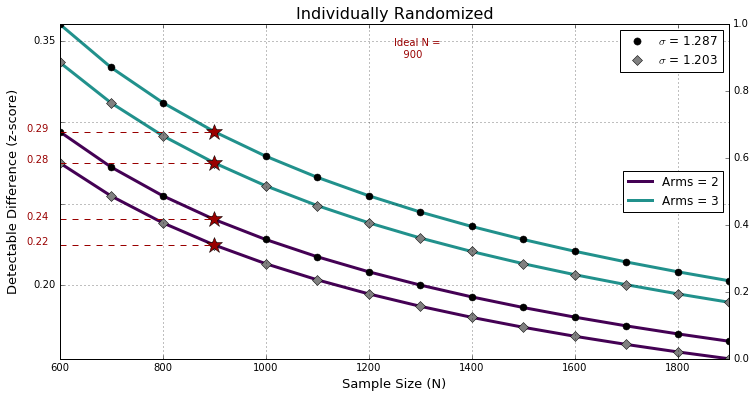

In [6]:
N = np.arange(600,2000,100)
arms = np.array([2.0,3.0])
s = np.array([1.287,1.203])
Za = 1.96
Zb = 0.84

fig = ss_indivRand(N,arms,s,Za,Zb,900)
plt.savefig('Individual_0914.pdf', bbox_inches='tight')

NameError: name 'd' is not defined